# Region, Month et District

In [1]:
# Chargement des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import ace_tools as tools

ModuleNotFoundError: No module named 'ace_tools'

In [2]:
# Chargement des données
saumons = pd.read_csv("saumons.csv", sep=',')

# Vérifier les premières lignes du DataFrame
print(saumons.head())
print(saumons.columns)

  District  District ID  Report order Region                   Method    Year  \
0    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   
1    Tweed        101.0           1.0   East  Net and Coble: Retained  1952.0   
2    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   
3    Tweed        101.0           1.0   East  Net and Coble: Retained  1952.0   
4    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   

      Month  Month number  Wild MSW number  Wild MSW weight (kg)  ...  \
0  February           2.0            107.0                 400.5  ...   
1  February           2.0           6606.0               24856.9  ...   
2     March           3.0            185.0                 703.1  ...   
3     March           3.0           7008.0               26151.9  ...   
4     April           4.0            484.0                1912.3  ...   

   Wild 1SW weight (kg)  Sea trout number  Sea trout weight (kg)  \
0     

In [3]:
# Importation des données
District = saumons["District"];

In [4]:
 # Nombre d'occurrences par catégorie 
saumons["District"].value_counts() 

District
Tweed        951
North Esk    838
Nith         791
Cree         722
South Esk    628
            ... 
Ruel           3
Orkney         3
Scaddle        2
Fincastle      2
Arnisdale      1
Name: count, Length: 97, dtype: int64

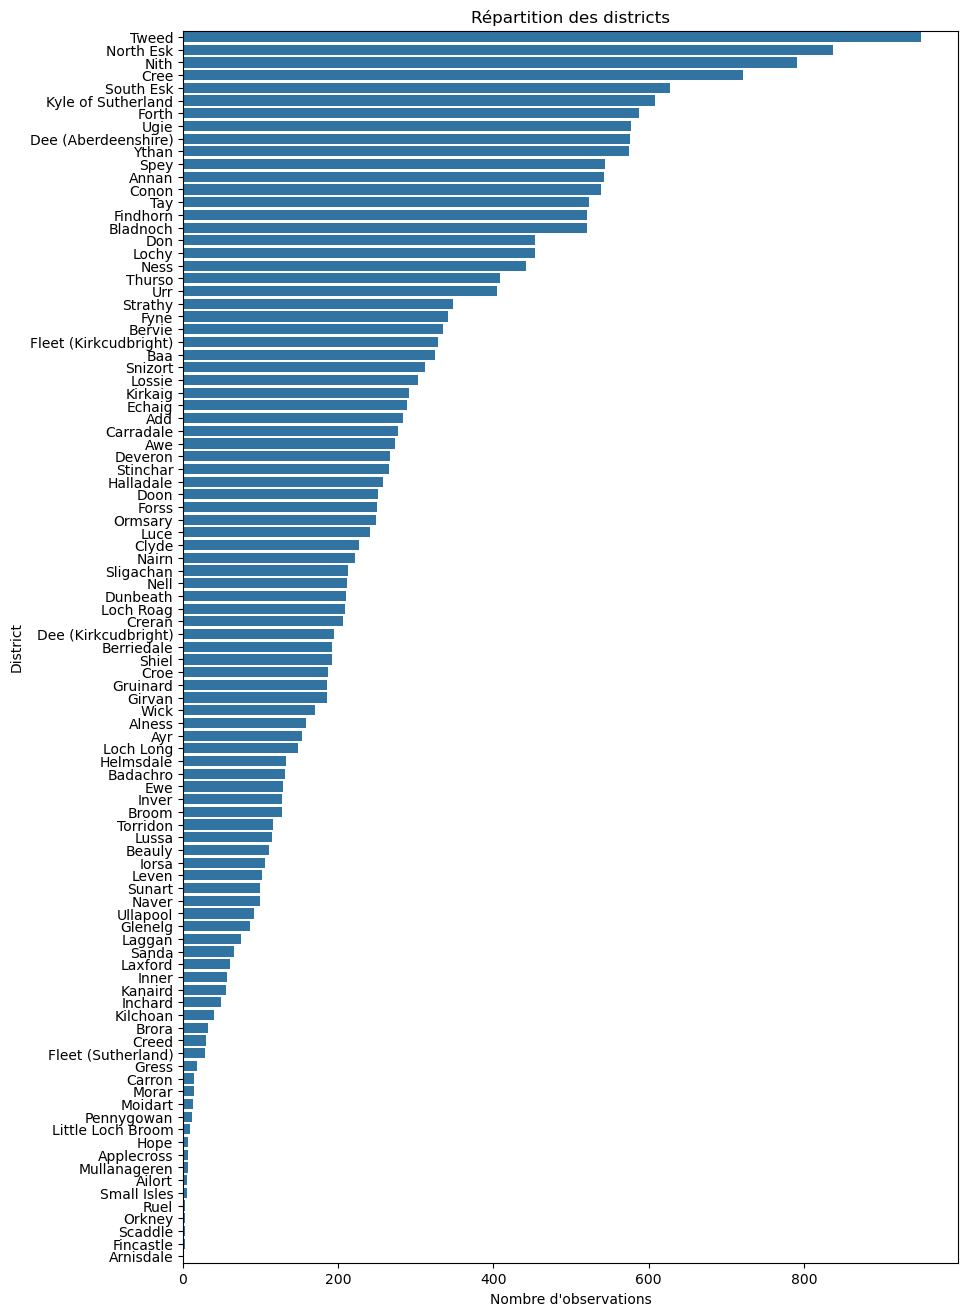

In [5]:
plt.figure(figsize=(10,16))
sns.countplot(y=saumons["District"], order=saumons["District"].value_counts().index)
plt.xlabel("Nombre d'observations")
plt.ylabel("District")
plt.title("Répartition des districts")
plt.show()

In [6]:
# Importation des données
Region= saumons["Region"];

In [7]:
# Nombre d'occurrences par catégorie 
saumons["Region"].value_counts() 

Region
North East        3983
Solway            3746
Moray Firth       3105
North             2744
North West        2610
West Coast        2527
Clyde Coast       2096
East              2061
Outer Hebrides     265
Orkney               3
Name: count, dtype: int64

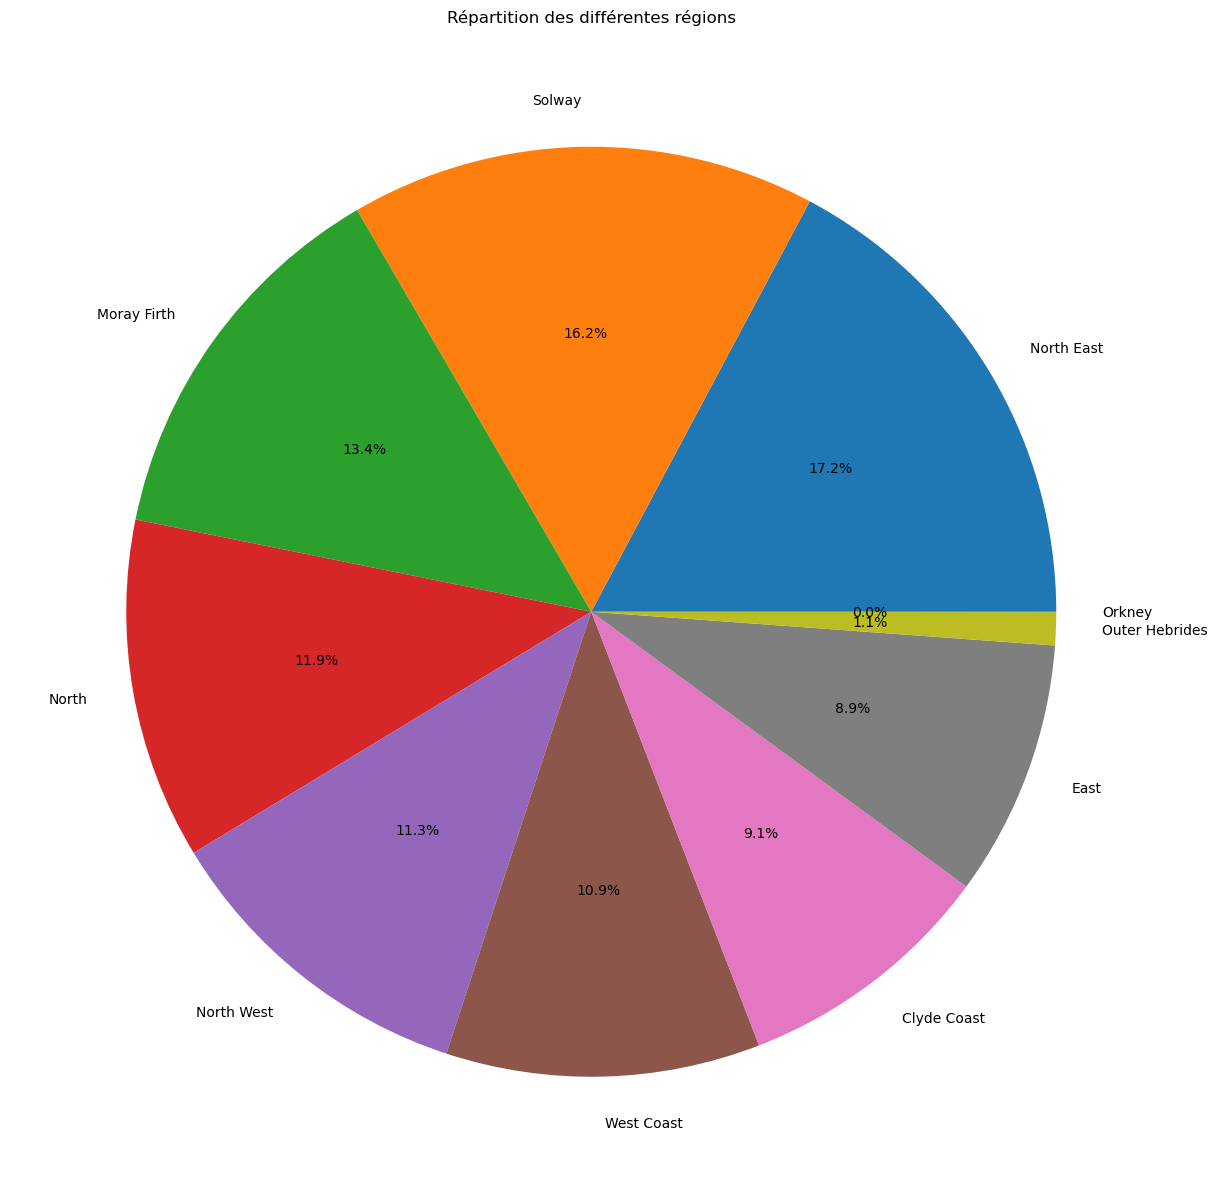

In [8]:
saumons["Region"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(15, 20))
plt.title("Répartition des différentes régions")
plt.ylabel("")
plt.show()

In [9]:
mois_ordre = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
saumons['Month'] = pd.Categorical(saumons['Month'], categories=mois_ordre, ordered=True)
# Affichage des modalités uniques
print("Modalités de 'Month' :", saumons['Month'].unique())

Modalités de 'Month' : ['February', 'March', 'April', 'May', 'June', ..., 'August', 'September', 'November', 'October', NaN]
Length: 11
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']


In [10]:
# Effectifs
effectifs = saumons['Month'].value_counts().sort_index()
# Fréquences
frequences = effectifs / effectifs.sum()

# Tableau résumé
tableau = pd.DataFrame({'Effectif': effectifs, 'Fréquence': frequences.round(4)})
print("\nTableau résumé :\n", tableau)


Tableau résumé :
            Effectif  Fréquence
Month                         
January           0     0.0000
February       1039     0.0449
March          1461     0.0631
April          2230     0.0964
May            3428     0.1481
June           4462     0.1928
July           4978     0.2151
August         4514     0.1951
September      1026     0.0443
October           1     0.0000
November          1     0.0000
December          0     0.0000


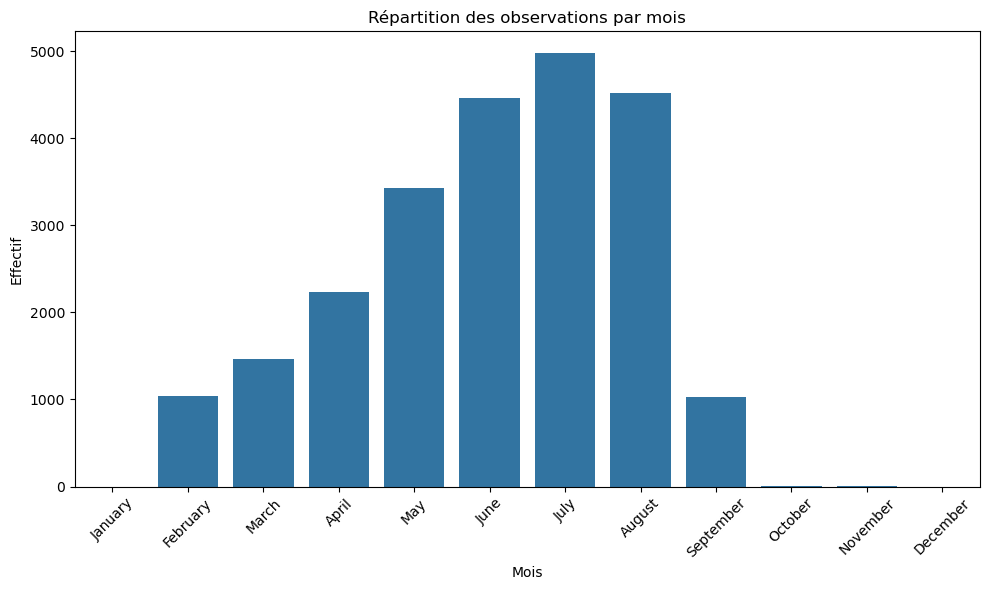

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=effectifs.index, y=effectifs.values)
plt.title('Répartition des observations par mois')
plt.xlabel('Mois')
plt.ylabel('Effectif')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Existe-t-il des relations significatives entre les variables Région, Mois et District ? Peut-on repérer des regroupements ou tendances particulières selon les périodes de l’année ou les zones géographiques ?

Pour répondre à cette problématique, nous réalisons une Analyse des Correspondances Multiples (ACM). Cette méthode est adaptée à des variables catégorielles, comme ici. Elle permet de visualiser les associations entre modalités dans un espace réduit à 2 dimensions.

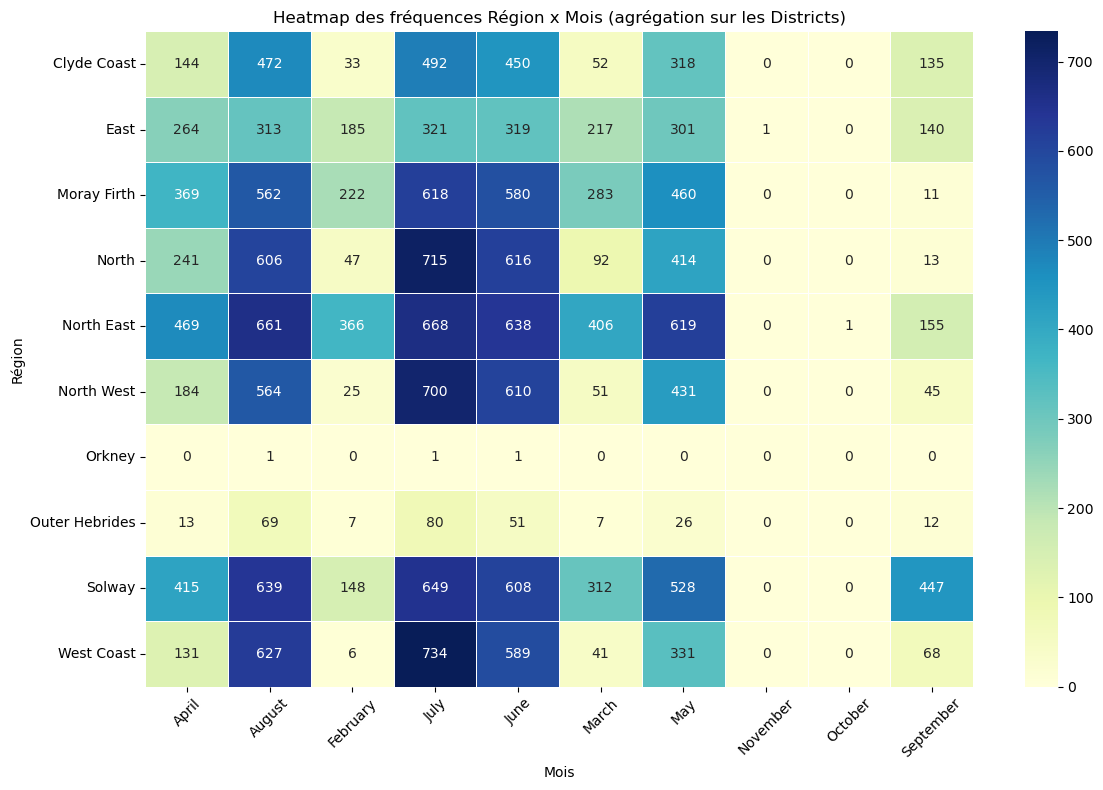

In [6]:
df_multi = df[['Region', 'Month', 'District']].dropna()
grouped = df_multi.groupby(['Region', 'Month', 'District']).size().reset_index(name='Count')

# Créer une table pivot pour la heatmap (par exemple Région x Mois, avec la somme des counts)
pivot_table = grouped.pivot_table(index='Region', columns='Month', values='Count', aggfunc='sum', fill_value=0)

# Tracer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title("Heatmap des fréquences Région x Mois (agrégation sur les Districts)")
plt.xlabel("Mois")
plt.ylabel("Région")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analyse croisée des variables Région et Mois
Afin d'explorer les relations entre les Régions et les Mois d'observation, nous avons construit une heatmap représentant la fréquence des observations pour chaque couple (Région, Mois).

Cette visualisation met en évidence plusieurs faits marquants :

Certaines régions présentent des pics nets d’activité à des périodes précises (par exemple, des valeurs élevées pour la région East au mois de mars ou avril), ce qui suggère une saisonnalité forte liée soit aux migrations de saumons, soit aux réglementations de pêche.

D'autres régions, comme North ou South West, montrent une répartition plus uniforme des observations sur l’année, indiquant possiblement une activité continue ou étendue dans le temps.

À l’inverse, plusieurs couples région/mois présentent des valeurs nulles ou très faibles, indiquant une absence ou une rareté des données pour ces périodes, potentiellement en lien avec des restrictions locales ou des conditions environnementales défavorables.

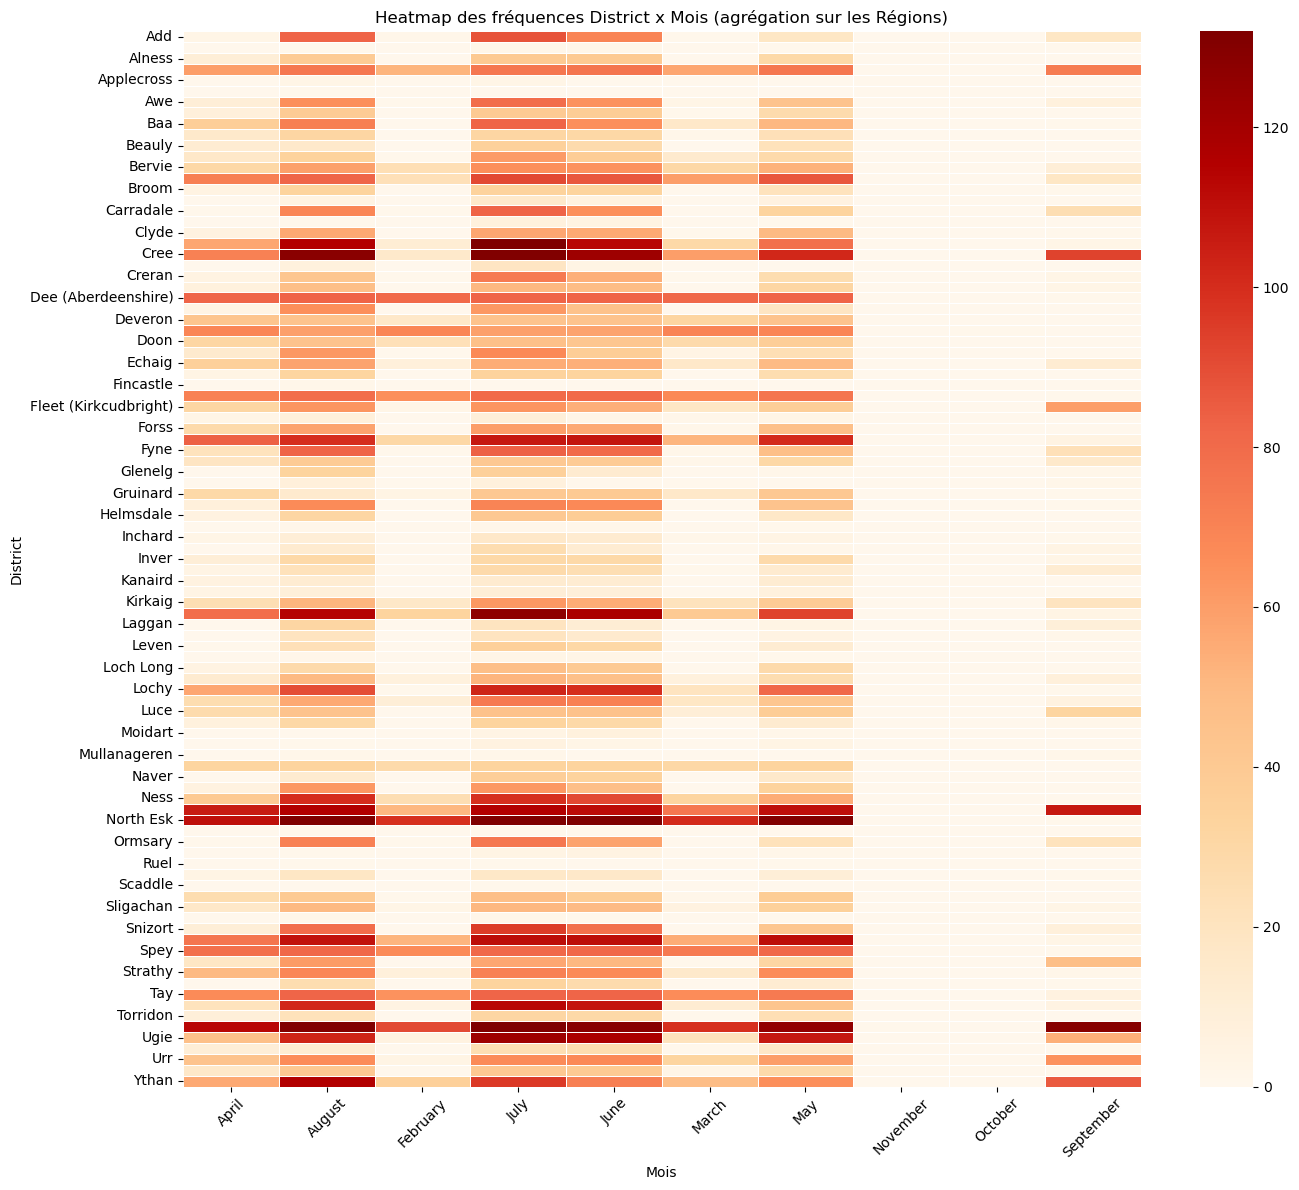

In [7]:
# Créer une heatmap croisant District et Mois, en fonction des fréquences (agrégation sur les Régions)
pivot_district_month = df_multi.groupby(['District', 'Month']).size().reset_index(name='Count')
pivot_district_month = pivot_district_month.pivot(index='District', columns='Month', values='Count').fillna(0)

# Tracer la heatmap District x Mois
plt.figure(figsize=(14, 12))
sns.heatmap(pivot_district_month, cmap='OrRd', annot=False, linewidths=0.5)
plt.title("Heatmap des fréquences District x Mois (agrégation sur les Régions)")
plt.xlabel("Mois")
plt.ylabel("District")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analyse croisée des variables District et Mois
En complément de l’analyse Région-Mois, nous avons réalisé une deuxième heatmap représentant la fréquence des observations par District et par Mois.

Cette visualisation permet de :

Repérer les districts dominants : Certains districts comme Tweed, Ness ou Dee ressortent nettement avec des fréquences élevées sur plusieurs mois, traduisant une activité intense.

Identifier les pics saisonniers propres à certains districts : Par exemple, certains districts sont très actifs uniquement sur les mois de mars à mai, ce qui peut correspondre à une période clé dans le cycle du saumon (remontée des rivières, pêche réglementée, etc.).

Observer une absence ou rareté d'activité dans certains districts pendant certaines périodes, ce qui peut être lié à des conditions locales (climat, réglementation, accès, etc.).

Cette heatmap complète utilement l’analyse précédente , essentielle pour comprendre les dynamiques géographiques fines du phénomène étudié.

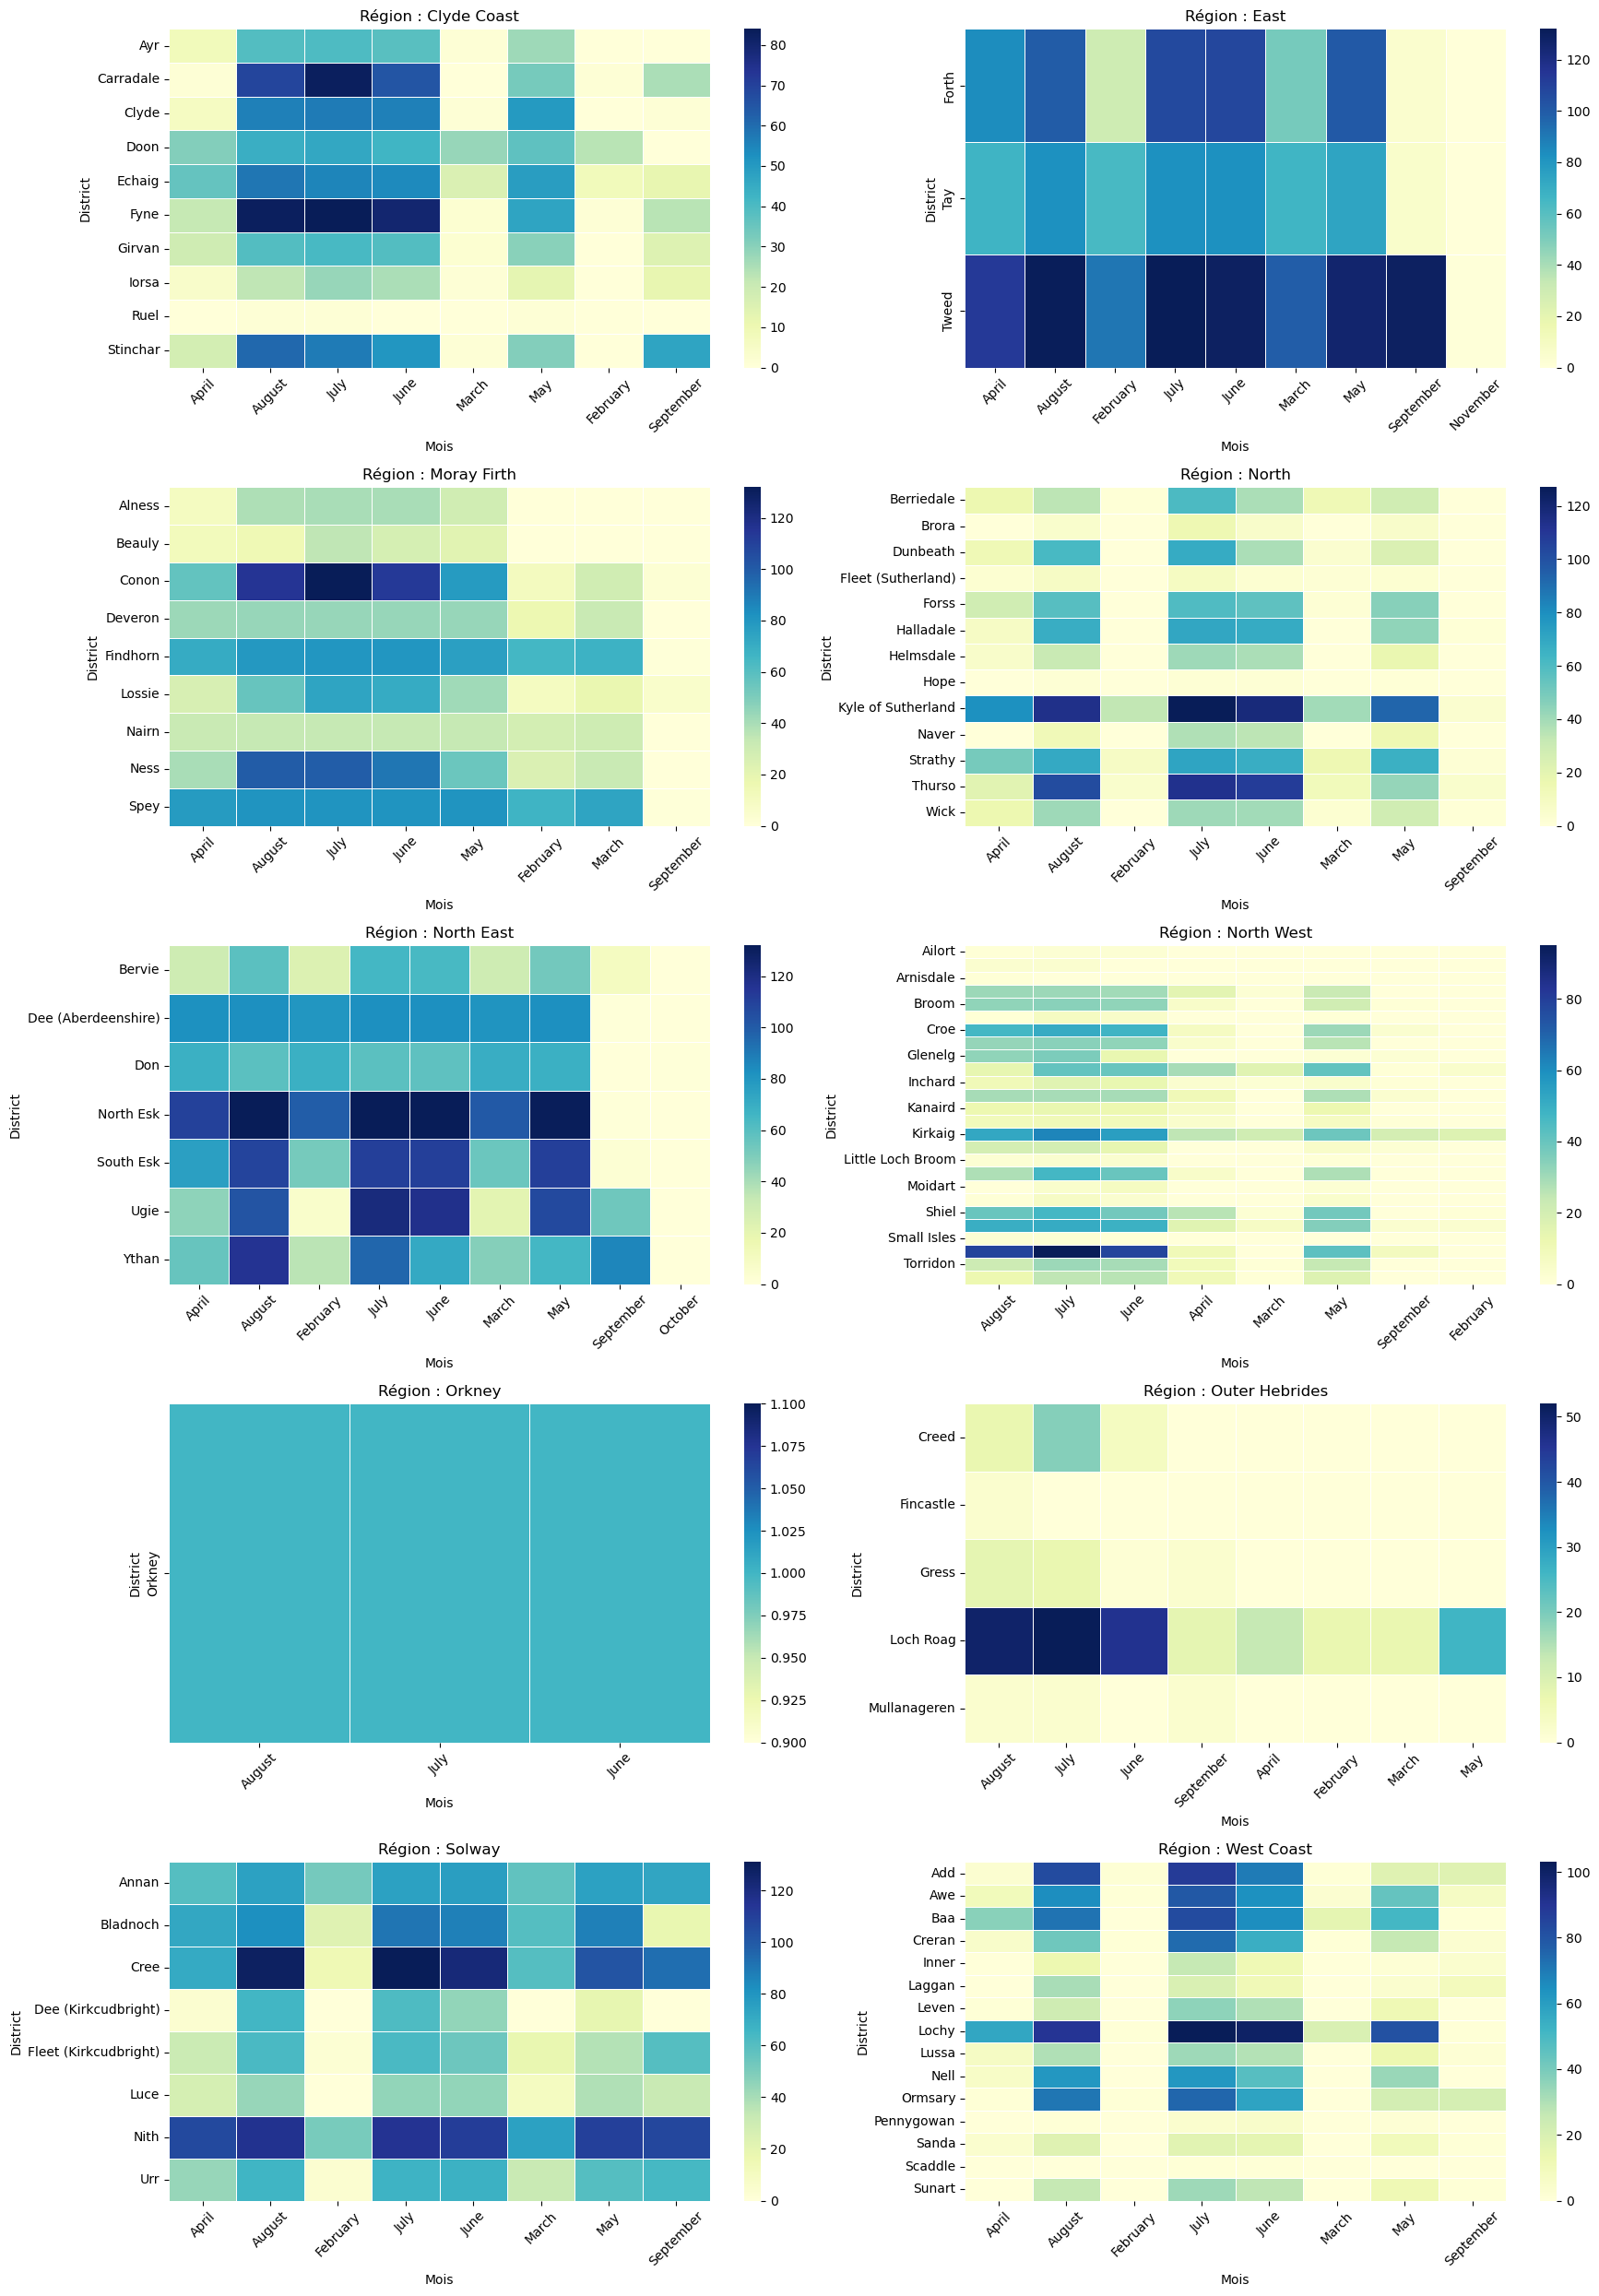

In [8]:
df_heat = df_multi.groupby(['Region', 'District', 'Month']).size().reset_index(name='Count')

# Pour l'affichage avec facet, on passe par un diagramme de type 'tile' via sns.heatmap-like style avec sns.scatterplot ou sns.barplot
# On encode Month pour qu'il soit bien ordonné
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_heat['Month'] = pd.Categorical(df_heat['Month'], categories=month_order, ordered=True)

# Tracer un heatmap-like plot via sns.heatmap pour chaque Région avec Pivot individuel
regions = df_heat['Region'].unique()
fig, axes = plt.subplots(nrows=(len(regions) + 1) // 2, ncols=2, figsize=(18, 5 * ((len(regions) + 1) // 2)))

for ax, region in zip(axes.flat, regions):
    sub = df_heat[df_heat['Region'] == region]
    pivot = sub.pivot(index='District', columns='Month', values='Count').fillna(0)
    sns.heatmap(pivot, ax=ax, cmap='YlGnBu', linewidths=0.5)
    ax.set_title(f"Région : {region}")
    ax.set_xlabel("Mois")
    ax.set_ylabel("District")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Clyde Coast :
Activité concentrée entre mars et août, avec des pics en juillet (Carradale, Clyde) et juin (Fyne).

Certains districts comme Iorsa ou Ruel ont une activité faible voire nulle.

East :
Très forte activité dans les districts Tweed, Tay, et Forth, notamment entre février et août.

Tweed se démarque nettement par son intensité et sa régularité.

Moray Firth :
Présence très marquée de Ness et Spey, en particulier entre avril et août.

Une tendance à l’activité soutenue au printemps et début d’été.

North :
Grande diversité de districts, mais seuls quelques-uns comme Strathy ou Naver concentrent l’essentiel de l’activité.

Forte saisonnalité autour de mars à juillet.

North East :
Districts comme North Esk, South Esk et Ythan très présents.

Pic d’activité notable en juin-juillet, mais activité observable dès février.

North West :
Plusieurs petits districts actifs (ex : Shieldaig, Torridon).

Fréquences modérées mais étalées, parfois dès février-mars, ce qui indique une présence continue.

Orkney :
Activité extrêmement faible : un seul district observé (Orkney), avec une unique observation par mois. Il s’agit très probablement d’une région marginale dans ce jeu de données.

Outer Hebrides :
District Loch Roag domine largement les autres.

Période d’activité très ciblée autour de juillet-août.

Solway :
Activité bien répartie sur plusieurs districts, avec des pics en mai à août.

Districts comme Nith, Urr et Luce sont particulièrement actifs.

West Coast :
Présence diffuse sur de nombreux petits districts (ex : Leven, Ormsary, Inver).

Forte saisonnalité entre mai et août.

